# Seleção de preditores: dívida no cartão de crédito
## Regressão Linear
#### - O dataset de credit card balance contém informação dos clientes com cartão de crédito incluindo dados bancários e pessoais.
#### - O objetivo desse notebook é utilizar a regressao linear para prever o Balance (Dívida) no cartão de crédito, selecionando os melhores preditores para um modelo _robusto e generalizável_.

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_palette("twilight_shifted_r")

In [2]:
data = pd.read_csv('CreditCardData2.csv')
data.shape

(400, 13)

In [3]:
data.head(4)

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964


#### Não há valores faltantes (missing data)

In [4]:
data.isna().sum().sum()

0

In [5]:
data.drop('Unnamed: 0', axis=1, inplace = True)
data.set_index('ID', inplace = True)

#### Transformando variáveis string em categóricas

In [6]:
data['Student'] = data['Student'].replace({'Yes':1,'No':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Ethnicity'] = data['Ethnicity'].replace({'Caucasian':'CA','Asian':'AS','African American':'AA'})

In [7]:
data['Student'] = data['Student'].astype('category')
data['Married'] = data['Married'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Ethnicity'] = data['Ethnicity'].astype('category')

## Entendendo a variável target: Balance
#### Balance é a média do saldo devido ao banco pelo cliente num dado período em meses, representando seus Dívidas médios no cartão de crédito. 


In [8]:
data['Balance'].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

Proporção de usuários com Dívida em cartão de crédito maior igual a 0

In [9]:
len(data[data['Balance']==0])/len(data)

0.225

## O objetivo da nossa modelagem é escolher as variáveis com base na sua importância para prever o Balance
#### Por isso, os clientes que não tiveram Dívidas no cartão (Balance = 0) serão tirados dataset de treino

In [10]:
data2 = data.copy()
data[data['Balance'] == 0] = np.nan
data.dropna(inplace = True)

#### Sem os valores nulos, a distribuição do saldo do cartão mostra-se concentrada em valores intermediários

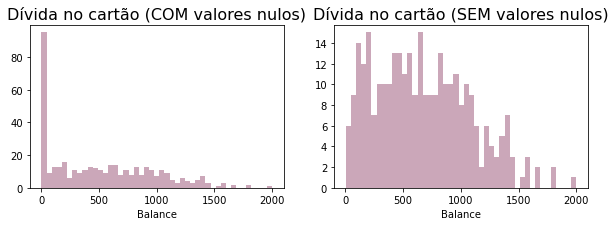

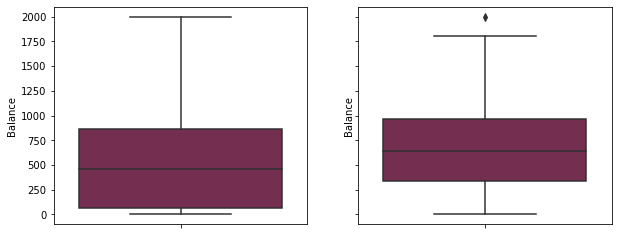

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10, 3))
fig2, ax2 = plt.subplots(1,2,figsize=(10, 4),sharey=True,sharex=True)

sns.distplot(data2['Balance'],kde = False, bins = 45,ax=ax[0]).set_title('Dívida no cartão (COM valores nulos)',fontsize=16)
sns.distplot(data['Balance'],kde = False, bins = 45,ax=ax[1]).set_title('Dívida no cartão (SEM valores nulos)',fontsize=16)
sns.boxplot(y = data2['Balance'],ax=ax2[0])
sns.boxplot(y = data['Balance'],ax=ax2[1])

plt.show()

## Preditores Quantitativos

In [12]:
data.iloc[:,2:9].describe()

,Rating,Cards,Age,Education
count,310.000000,310.000000,310.000000,310.000000
mean,405.051613,2.996774,55.606452,13.425806
std,137.967389,1.426740,17.341794,3.208904
min,126.000000,1.000000,23.000000,5.000000
25%,304.000000,2.000000,42.000000,11.000000
50%,380.000000,3.000000,55.500000,14.000000
75%,469.000000,4.000000,69.000000,16.000000
max,982.000000,9.000000,98.000000,20.000000


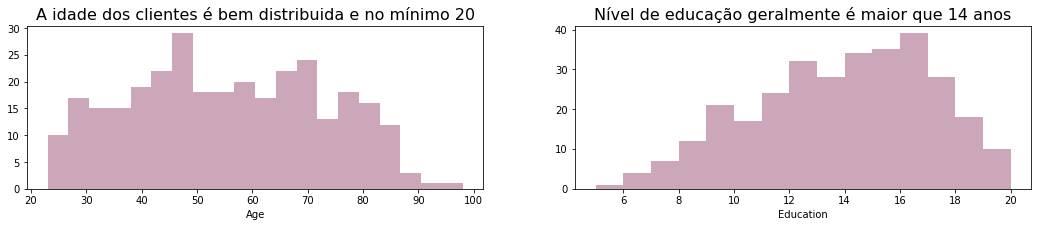

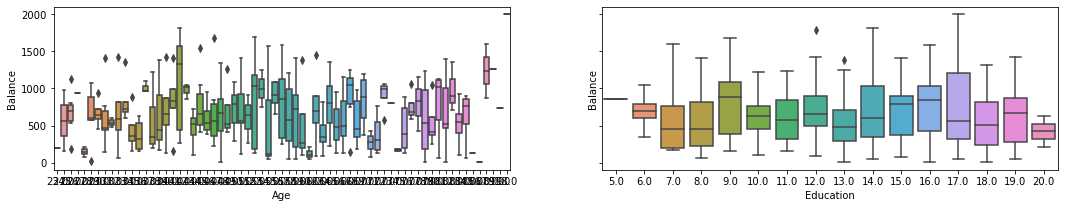

In [13]:
fig, axes = plt.subplots(1,2,figsize=(18,3))
fig2, axes2 = plt.subplots(1,2,figsize=(18,3),sharey=True)

sns.distplot(data['Age'], kde = False, bins = 20,ax=axes[0]).set_title('A idade dos clientes é bem distribuida e no mínimo 20',fontsize=16)
sns.distplot(data['Education'],kde=False,bins = 15,ax=axes[1]).set_title('Nível de educação geralmente é maior que 14 anos',fontsize=16)

sns.boxplot(x = data['Age'], y = data['Balance'],ax=axes2[0])
sns.boxplot(x = data['Education'], y = data['Balance'],ax=axes2[1])

plt.show()

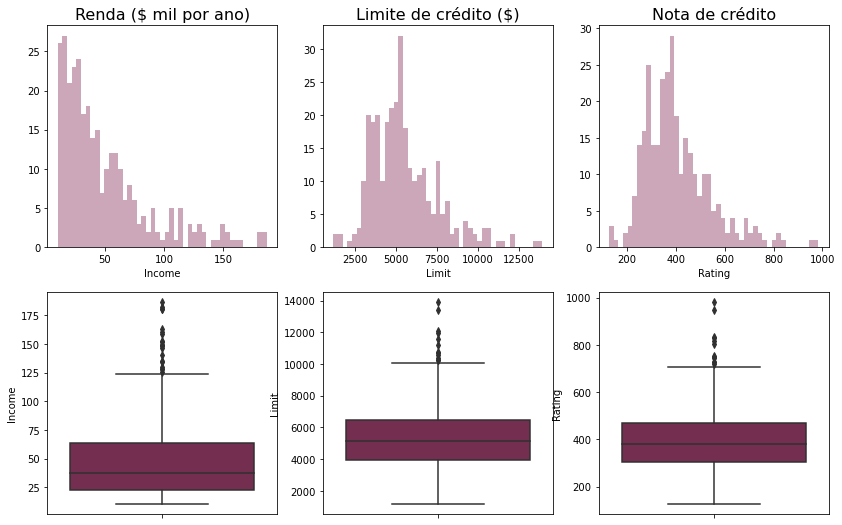

In [14]:
fig, axes = plt.subplots(2,3,figsize=(14,9))
sns.distplot(data['Income'], bins = 45, kde = False, ax = axes[0,0]).set_title('Renda ($ mil por ano)',fontsize=16)
sns.distplot(data['Limit'], bins = 45, kde = False, ax = axes[0,1]).set_title('Limite de crédito ($)',fontsize=16)
sns.distplot(data['Rating'], bins = 45, kde = False, ax = axes[0,2]).set_title('Nota de crédito',fontsize=16)
sns.boxplot(y = data['Income'],ax=axes[1,0])
sns.boxplot(y = data['Limit'],ax=axes[1,1])
sns.boxplot(y = data['Rating'],ax=axes[1,2])
plt.show()

## Variáveis categóricas

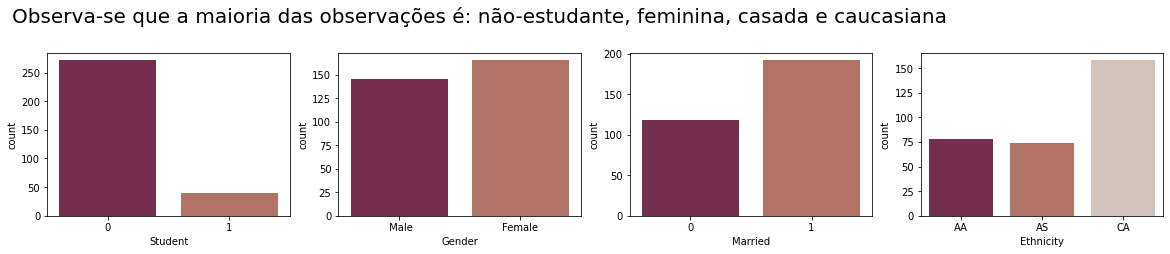

In [15]:
fig,axes=plt.subplots(1,4,figsize=(20,3))
sns.countplot(data=data,x='Student',ax=axes[0])
sns.countplot(data['Gender'],ax=axes[1])
sns.countplot(data['Married'],ax=axes[2])
sns.countplot(data['Ethnicity'],ax=axes[3])
fig.suptitle('Observa-se que a maioria das observações é: não-estudante, feminina, casada e caucasiana',ha='right',va='bottom', fontsize = 20, x=.75, y = 1)
plt.show()

In [16]:
data.describe(include='category')

,Gender,Student,Married,Ethnicity
count,310,310,310,310
unique,2,2,2,3
top,Female,0,1,CA
freq,165,271,192,158


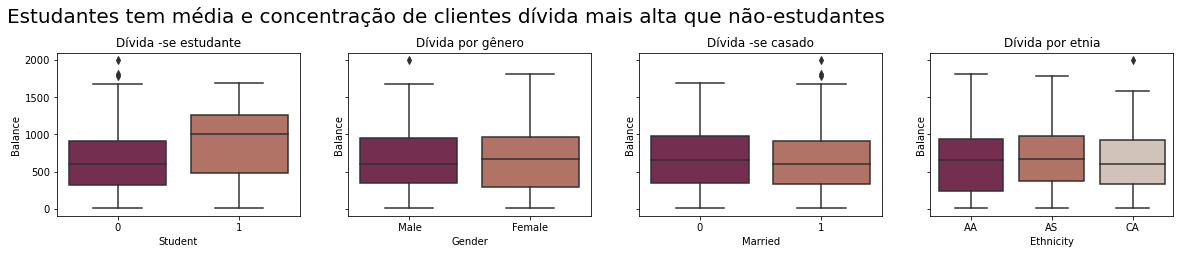

In [17]:
fig,ax = plt.subplots(1,4,figsize=(20, 3),sharey = True)

sns.boxplot(x = data['Student'], y = data['Balance'],ax=ax[0]).set_title('Dívida -se estudante')
sns.boxplot(y = data['Balance'], x = data['Gender'],ax=ax[1]).set_title('Dívida por gênero')
sns.boxplot(x = data['Married'], y = data['Balance'],ax=ax[2]).set_title('Dívida -se casado')
sns.boxplot(x = data['Ethnicity'], y = data['Balance'],ax=ax[3]).set_title('Dívida por etnia')
fig.suptitle('Estudantes tem média e concentração de clientes dívida mais alta que não-estudantes',ha='right',va='bottom', fontsize = 20, x=.7, y = 1)
plt.show()

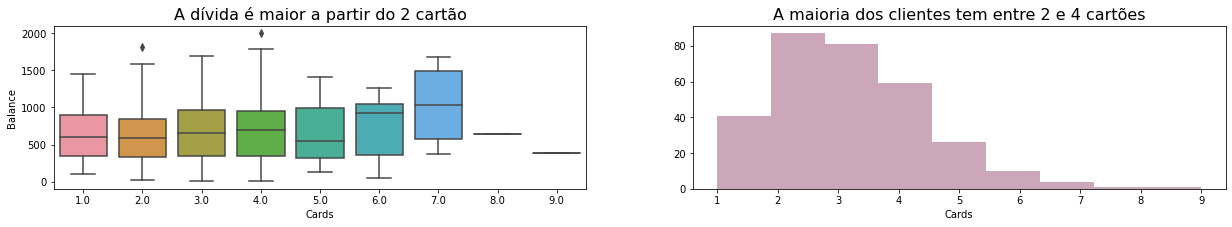

In [18]:
#Boxplot para multiplas categorias
fig, axes = plt.subplots(1, 2, figsize=(21, 3),sharey=False)

sns.boxplot(x = data['Cards'], y = data['Balance'],ax=axes[0]).set_title('A dívida é maior a partir do 2 cartão',fontsize=16)
sns.distplot(data['Cards'],bins=9,kde=False,ax=axes[1]).set_title('A maioria dos clientes tem entre 2 e 4 cartões',fontsize=16)

plt.show()

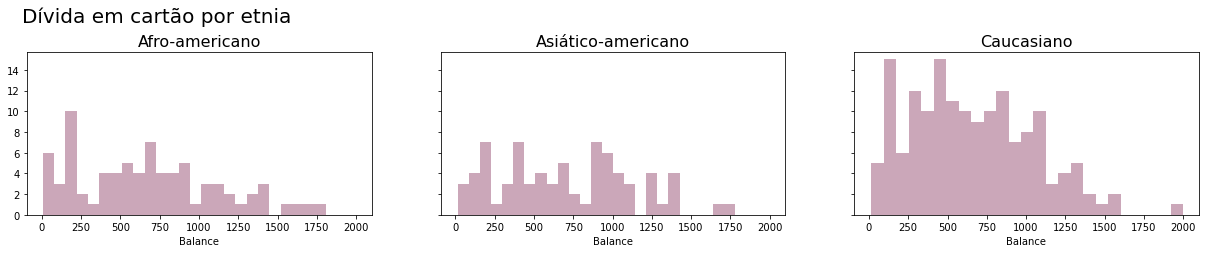

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(21,3),sharey=True,sharex=True)

filtro = data.query('Ethnicity=="AA"')
sns.distplot(filtro['Balance'],kde=False,bins=25,ax=axes[0]).set_title('Afro-americano',fontsize=16)
filtro = data.query('Ethnicity=="AS"')
sns.distplot(filtro['Balance'],kde=False,bins=25,ax=axes[1]).set_title('Asiático-americano',fontsize=16)
filtro = data.query('Ethnicity=="CA"')
sns.distplot(filtro['Balance'],kde=False,bins=25,ax=axes[2]).set_title('Caucasiano',fontsize=16)

fig.suptitle('Dívida em cartão por etnia',ha='right',va='bottom', fontsize = 20, x=.3, y = 1)
plt.show()

## Análise multivariada e correlações<br>
#### - Identificar as variáveis mais correlacionadas com nosso target - indício de variável importante
#### - Identificar as variaveis preditoras mais correlacionadas entre si - indício de multicolinearidade

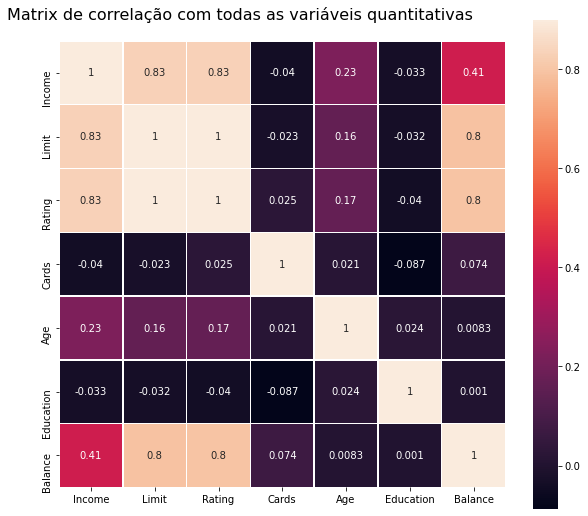

In [20]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.9, square=True,annot=True,linewidths=.5)
f.suptitle('Matrix de correlação com todas as variáveis quantitativas',ha='right', fontsize = 16, x=.7, y = .9)
plt.show()

#### Reduzindo as variáveis na matriz, conseguimos observar as maiores correlações com o target

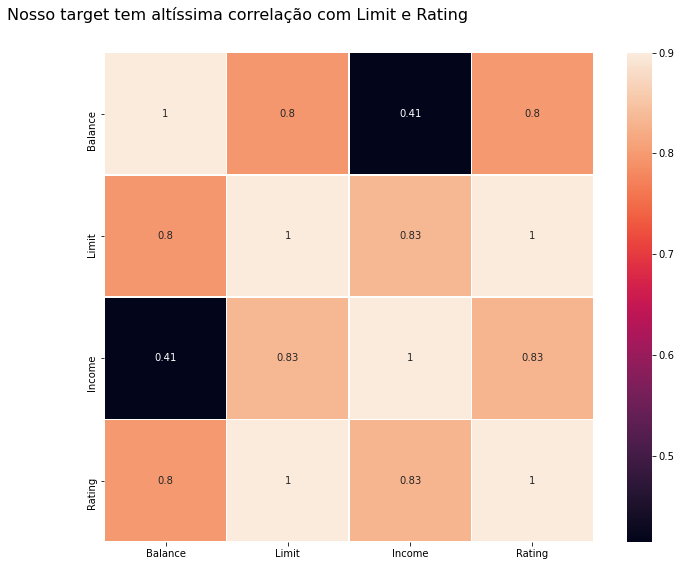

In [21]:
df = data.loc[:,['Balance','Limit','Income','Rating']]
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True,annot=True,linewidths=.5)
f.suptitle('Nosso target tem altíssima correlação com Limit e Rating',ha = 'right',fontsize = 16,x=.6,y = .95)
plt.show()

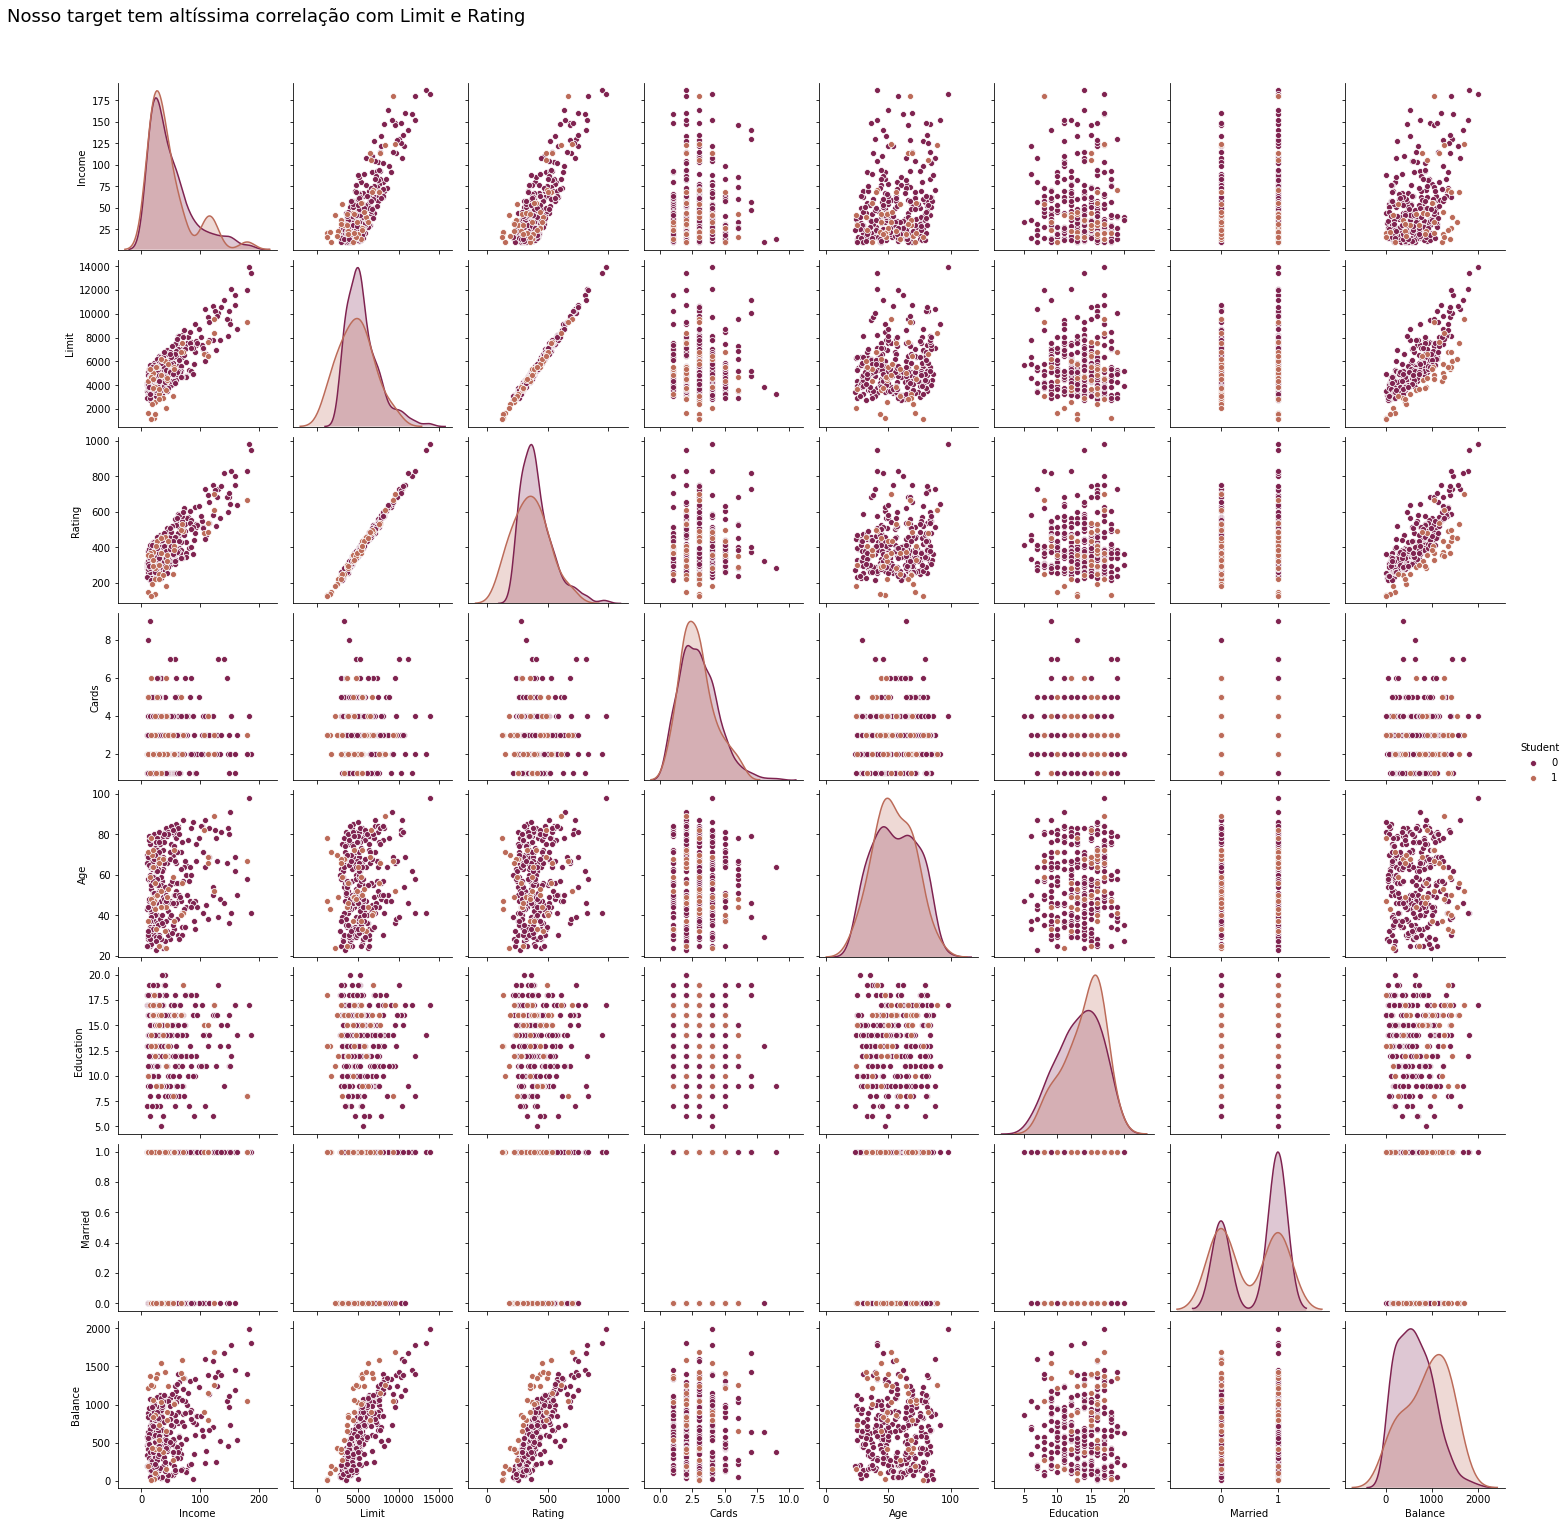

In [22]:
a = sns.pairplot(data,hue='Student')
a.fig.suptitle("Nosso target tem altíssima correlação com Limit e Rating",ha = 'right',fontsize = 18,x=.3,y = 1.05)
plt.show()

## Escolha dos preditores/variáveis
A inclusão de todas as variáveis no modelo explica praticamente toda a variância de Balance. Por isso, o modelo com certeza está com overfitting e algumas variáveis precisam sair para deixar o modelo mais generalizável

### Regressão com todas as variáveis do dataset tem R² de 99,9%
Entretanto, numa primeira análise
 - Ethnicity, Gender e Education possuem os maiores p-value, podendo indicar que não são bons preditores para Balance
 - O modelo possui alta multicolinearidade

In [23]:
model1 = sm.OLS.from_formula("Balance ~ Income + Limit + Rating + Cards + Education + Age + Ethnicity + Gender + Student + Married ", data=data)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.366e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:08:34   Log-Likelihood:                -1162.5
No. Observations:                 310   AIC:                             2349.
Df Residuals:                     298   BIC:                             2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -696.9077      4.412   -157.956      0.000    -705.590    -688.225
Ethnicity[T.AS]     -1.3785      1.731     -0.796      0.426      -4.784       2.027
Ethnicity[T.CA]     -0.0700      1.467     -0.048      0.962      -2.956       2.816
Gender[T.Female]     0.2332      1.200      0.194      0.846      -2.129       2.596
Student[T.1]       500.8310      1.880    266.464      0.000     497.132     504.530
Married[T.1]        -2.0625      1.261     -1.636      0.103      -4.543       0.418
Income              -9.9916      0.029   -339.458      0.000     -10.050      -9.934
Limit                0.3360      0.004     84.135      0.000       0.328       0.344
Rating              -0.1433      0.059     -2.428      0.016      -0.259      -0.027
Cards               25.4764      0.500     50.962      0.000      24.493      26.460
Education           -0.0080      0.189     -0.042      0.966      -0.381       0.365
Age                 -1.0029      0.036    -28.215      0.000      -1.073      -0.933
==============================================================================
Omnibus:                        3.799   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.766
Skew:                          -0.269   Prob(JB):                        0.152
Kurtosis:                       2.963   Cond. No.                     4.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Próximo passo: excluir Ethnicity, Gender e Education do modelo
- Não alterou o R²
- Fstatistic aumentou 
- Problema da multicolinearidade persiste entre Limit, Rating e Income (baixo std)


In [24]:
model1 = sm.OLS.from_formula("Balance ~ Income + Limit + Rating + Cards + Age + Student + Married", data=data)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.932e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:08:34   Log-Likelihood:                -1163.0
No. Observations:                 310   AIC:                             2342.
Df Residuals:                     302   BIC:                             2372.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -697.1866      3.366   -207.138      0.000    -703.810    -690.563
Student[T.1]   500.6625      1.849    270.719      0.000     497.023     504.302
Married[T.1]    -2.1832      1.236     -1.766      0.078      -4.616       0.249
Income          -9.9908      0.029   -341.683      0.000     -10.048      -9.933
Limit            0.3358      0.004     84.987      0.000       0.328       0.344
Rating          -0.1397      0.058     -2.392      0.017      -0.255      -0.025
Cards           25.4523      0.496     51.277      0.000      24.475      26.429
Age             -1.0024      0.035    -28.405      0.000      -1.072      -0.933
==============================================================================
Omnibus:                        3.703   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.685
Skew:                          -0.266   Prob(JB):                        0.158
Kurtosis:                       2.951   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Próximo passo: Excluir Rating 
- Dentre as 3 com sinais de multicolinearidade escolhi excluir Rating por ser a variável menos 'pura' e resultado de avaliações internas do banco
- O R² manteve-se altissimo, mostrando que Rating não explicava diferentes trechos de variância
- Problema da multicolinearidade persiste com Limit e Income.

In [25]:
model1 = sm.OLS.from_formula("Balance ~ Income + Limit + Cards + Age + Student + Married", data=data)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.963e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:08:34   Log-Likelihood:                -1165.9
No. Observations:                 310   AIC:                             2346.
Df Residuals:                     303   BIC:                             2372.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -700.0469      3.171   -220.796      0.000    -706.286    -693.808
Student[T.1]   500.1920      1.853    269.914      0.000     496.545     503.839
Married[T.1]    -2.4817      1.239     -2.002      0.046      -4.920      -0.043
Income          -9.9911      0.029   -339.064      0.000     -10.049      -9.933
Limit            0.3264      0.001    603.876      0.000       0.325       0.327
Cards           24.8086      0.420     59.025      0.000      23.982      25.636
Age             -1.0055      0.036    -28.295      0.000      -1.075      -0.936
==============================================================================
Omnibus:                        5.078   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.197
Skew:                          -0.306   Prob(JB):                       0.0744
Kurtosis:                       2.831   Cond. No.                     3.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Proximo passo: excluir Income
- Entre Income e Limit, a exclusão de Income deu menor prejuízo ao R²
- Redução do R² e F-stat
- Alto p-value e baixo teste t no coeficiente de Married 

In [26]:
model1 = sm.OLS.from_formula("Balance ~ Limit + Cards + Age + Student + Married", data=data)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           1.17e-91
Time:                        18:08:34   Log-Likelihood:                -2086.8
No. Observations:                 310   AIC:                             4186.
Df Residuals:                     304   BIC:                             4208.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -238.7739     55.766     -4.282      0.000    -348.510    -129.038
Student[T.1]   395.5642     35.581     11.117      0.000     325.547     465.581
Married[T.1]   -21.0319     24.108     -0.872      0.384     -68.472      26.408
Limit            0.1736      0.006     29.886      0.000       0.162       0.185
Cards           30.4067      8.178      3.718      0.000      14.314      46.499
Age             -3.0603      0.682     -4.488      0.000      -4.402      -1.719
==============================================================================
Omnibus:                        8.149   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.454
Skew:                          -0.400   Prob(JB):                       0.0146
Kurtosis:                       2.883   Cond. No.                     2.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Proximo passo: excluir Income
- Entre Income e Limit, a exclusão de Income deu menor prejuízo ao R²
- Redução do R² e F-stat
- Alto p-value e baixo teste t no coeficiente de Married 
- A multicolinearidade (entre Limit e Balance) persiste, mas a exclusão de Limit compromete grandemente o modelo

In [27]:
model1 = sm.OLS.from_formula("Balance ~ Limit + Age + Cards + Student", data=data)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     239.2
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           1.04e-92
Time:                        18:08:35   Log-Likelihood:                -2087.2
No. Observations:                 310   AIC:                             4184.
Df Residuals:                     305   BIC:                             4203.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -252.6496     53.429     -4.729      0.000    -357.785    -147.514
Student[T.1]   398.6916     35.386     11.267      0.000     329.059     468.324
Limit            0.1735      0.006     29.887      0.000       0.162       0.185
Age             -3.0441      0.681     -4.468      0.000      -4.385      -1.703
Cards           30.4315      8.175      3.723      0.000      14.346      46.517
==============================================================================
Omnibus:                        8.394   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.699
Skew:                          -0.408   Prob(JB):                       0.0129
Kurtosis:                       2.911   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### O modelo agora parece ter um valor razoavel para r² e uma quantidade boa de variáveis preditoras. 
#### Nosso proximo passo é plotar o modelo no gráfico e vizualizar sua adequação

In [28]:
beta = result1.params

In [29]:
#Transforma series de Student em array para cálculo numérico da reta de y predito (y_hat)
student = np.array(data['Student'])
y_hat = beta[0] + beta[1]*student + beta[2]*data['Limit'] + beta[3]*data['Age'] + beta[4]*data['Cards']

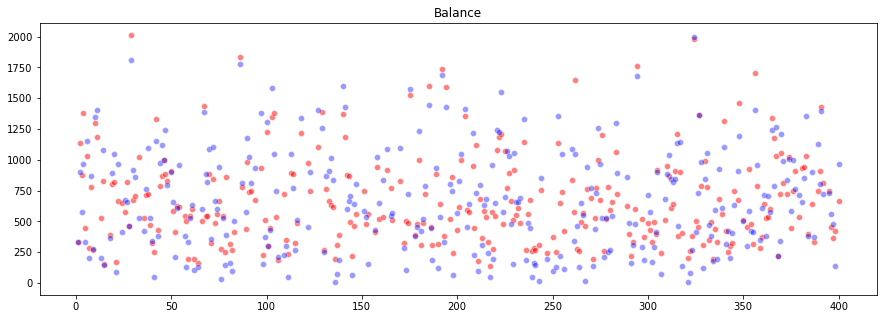

In [30]:
plt.subplots(figsize=(15, 5))
sns.scatterplot(data=y_hat,color='red',legend='full',alpha=.5).set_title('Balance')
sns.scatterplot(data=data['Balance'], color='blue',alpha=.4)
plt.show()

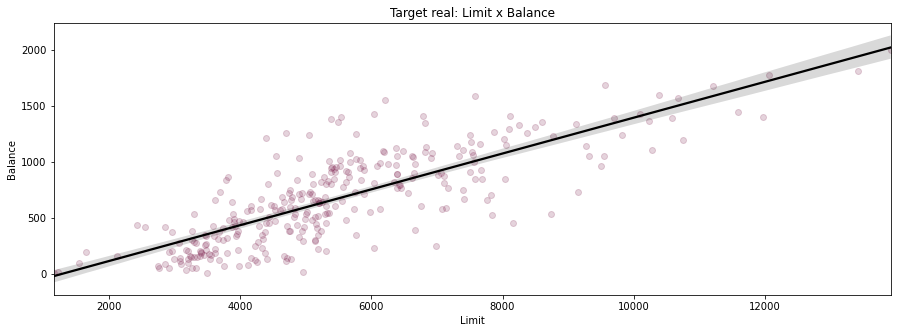

In [31]:
plt.subplots(figsize=(15, 5))
sns.regplot(x='Limit',y='Balance',data=data,scatter_kws={'alpha':0.2},line_kws={'color':'black'}).set_title('Target real: Limit x Balance')
plt.show()

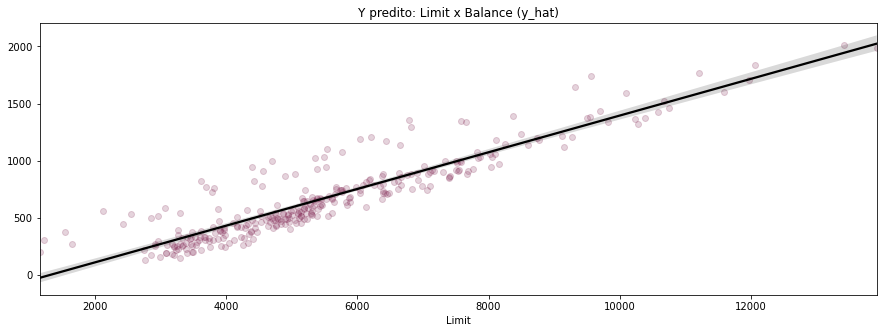

In [32]:
plt.subplots(figsize=(15, 5))
sns.regplot(x='Limit',y=y_hat,data=data,scatter_kws={'alpha':0.2},line_kws={'color':'black'}).set_title('Y predito: Limit x Balance (y_hat)')
plt.show()